In [1]:
%%capture
!pip install gdown

In [17]:
import gdown

import pandas as pd
import matplotlib.pyplot as plt

import xml.etree.ElementTree as ET

from pandas.plotting import autocorrelation_plot

In [3]:
%%capture

ROUTE_GPX = 'route.gpx'
ROUTE_GPX_URL = 'https://drive.google.com/file/d/1ypx5oiromH9WRQpqAPNxZYQO6T3Dd0fP/view?usp=sharing'

gdown.download(ROUTE_GPX_URL, ROUTE_GPX, quiet=True, fuzzy=True)

In [4]:
def parse_gpx(filepath):
    root = ET.parse(filepath).getroot()

    ns = '{http://www.topografix.com/GPX/1/1}'
    data = {
        'time': [], 'lat': [], 'lon': [],
    }

    for trk in root.findall(f".//{ns}trk"):
        for trkseg in trk.findall(f"{ns}trkseg"):
            for trkpt in trkseg.findall(f"{ns}trkpt"):
                data['lat'].append(float(trkpt.get('lat')))
                data['lon'].append(float(trkpt.get('lon')))

                time_elem = trkpt.find(f"{ns}time")
                data['time'].append(time_elem.text if time_elem is not None else None)

    df = pd.DataFrame(data)

    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)

    return df

df = parse_gpx(ROUTE_GPX)
df.head()

,lat,lon
time,,
2024-10-23 14:40:41+00:00,20.993548,105.869445
2024-10-23 14:40:42+00:00,20.993654,105.869488
2024-10-23 14:40:43+00:00,20.993704,105.869451
2024-10-23 14:40:44+00:00,20.993710,105.869408
2024-10-23 14:40:45+00:00,20.993731,105.869388


<Axes: title={'center': 'Lat distbution'}, ylabel='Density'>

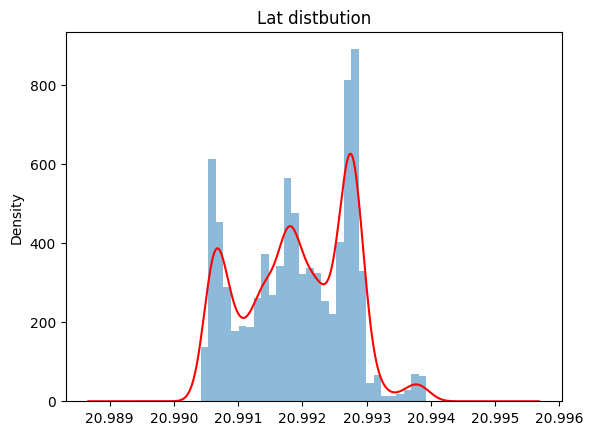

In [5]:
plt.title('Lat distbution')
df['lat'].plot(kind='hist', bins=30, density=True, alpha=0.5)
df['lat'].plot(kind='kde', color='r')

<Axes: title={'center': 'Lon distbution'}, ylabel='Density'>

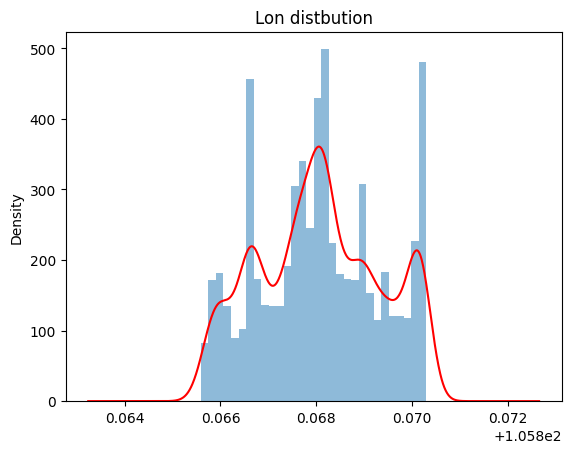

In [6]:
plt.title('Lon distbution')
df['lon'].plot(kind='hist', bins=30, density=True, alpha=0.5)
df['lon'].plot(kind='kde', color='r')

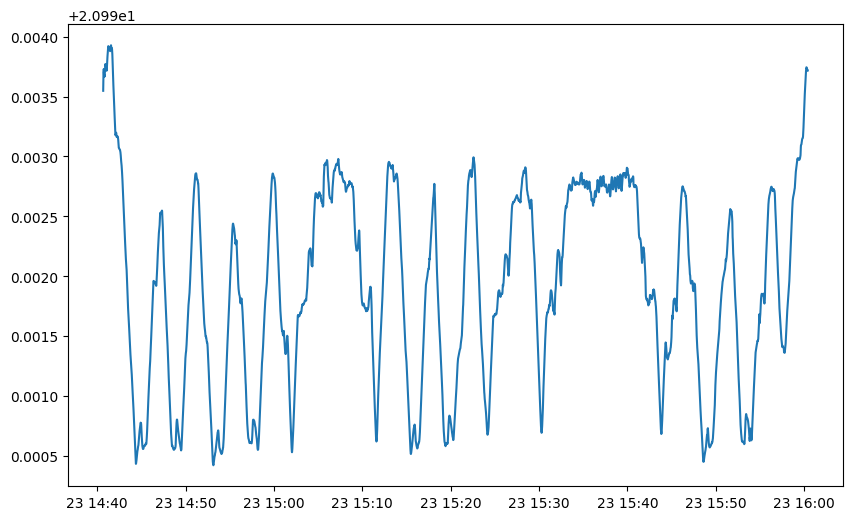

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['lat'])
plt.show()

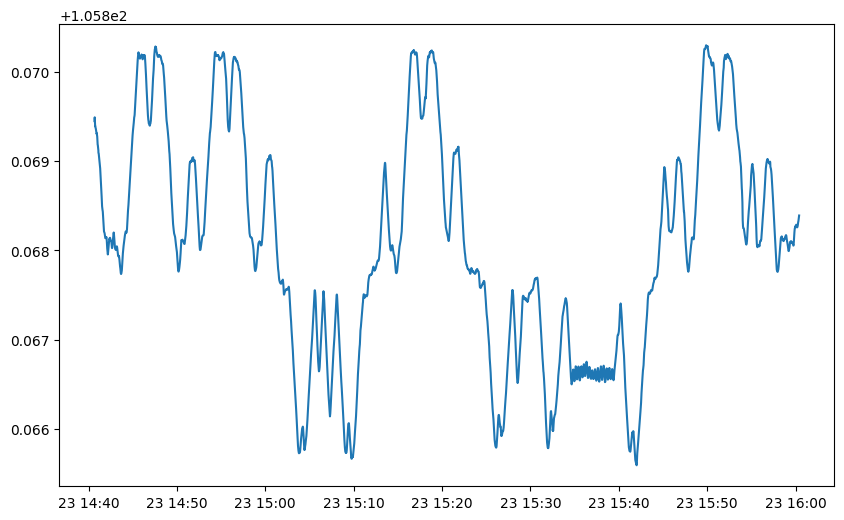

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['lon'])
plt.show()

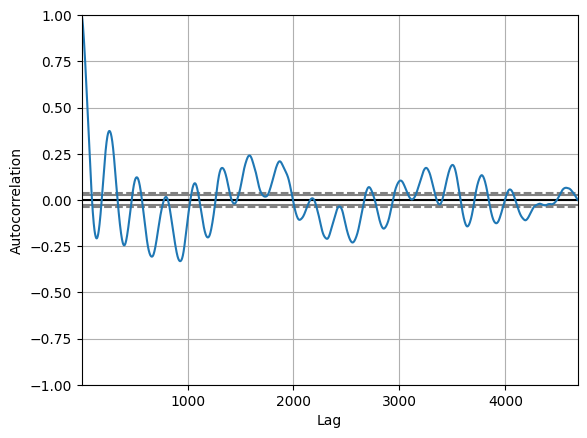

In [15]:
autocorrelation_plot(df['lat'])
plt.show()

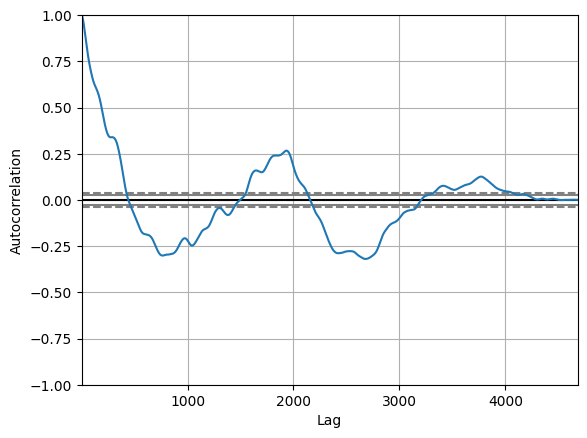

In [16]:
autocorrelation_plot(df['lon'])
plt.show()